## Gc positive graph

imports "article_pos1.gml"
- saves "nodes_df_positive.csv"
    - node labels, degrees, and centralities for entire network
- saves "Gc_positive.gml"

imports "Gc_positive.gml"
- saves "Gc_df_pos.csv"
    - node labels, degrees, and centralities for greatest component

In [1]:
# 1_network_df

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from glob import glob

plt.style.use('ggplot')
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

gml_files = glob('../output/network/article_pos1.gml')

In [2]:
def calculate_graph_inf(graph):
    graph.name = filename
    info = nx.info(graph)
    print info
    #plt.figure(figsize=(10,10))
    #nx.draw_spring(graph, arrows=True, with_labels=True)

def highest_centrality(cent_dict):
    """Returns a tuple (node,value) with the node
    with largest value from centrality dictionary."""
    # create ordered tuple of centrality data
    cent_items = [(b,a) for (a,b) in cent_dict.iteritems()]
    # sort in descending order
    cent_items.sort()
    cent_items.reverse()
    return tuple(reversed(cent_items[0]))

- - -

# all nodes table

In [57]:
# 2_node_df: list all nodes and centrality
data_columns = ['name',
                'sentiment'
                ]
data = pd.DataFrame(columns = data_columns)
combined_df = pd.DataFrame()

In [4]:
# graph = directed, ugraph = undirected
for graph_num, gml_graph in enumerate(gml_files):
    graph = nx.read_gml(gml_graph)
    ugraph = graph.to_undirected() # to undirected graph
    U = graph.to_undirected(reciprocal=True)
    e = U.edges()
    ugraph.add_edges_from(e)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)
    calculate_graph_inf(ugraph)

    ## calculate variables and save into list
    sent = "pos"    
    deg_cent = nx.degree_centrality(graph)
    bet_cent = nx.betweenness_centrality(graph)
    clo_cent = nx.closeness_centrality(graph)
    graph_values = {'name':filename,
                    'sentiment':sent
                    }
    data = data.append(graph_values, ignore_index=True)

    degree = nx.degree(graph)
    deg_df = pd.DataFrame.from_dict(degree, orient = 'index')
    deg_df.columns = ['degree']
    # degree centrality
    deg_cent = nx.degree_centrality(graph)
    dc_df = pd.DataFrame.from_dict(deg_cent, orient = 'index')
    dc_df.columns = ['deg cent']
    # betweenness centrality
    bet_cent = nx.betweenness_centrality(graph)
    bc_df = pd.DataFrame.from_dict(bet_cent, orient = 'index')
    bc_df.columns = ['bet cent']
    # closeness centrality
    clo_cent = nx.closeness_centrality(graph)
    cc_df = pd.DataFrame.from_dict(clo_cent, orient = 'index')
    cc_df.columns = ['clo cent']
    # concat node frames into node_df
    frames = [deg_df, dc_df, bc_df, cc_df]
    node_df = pd.concat(frames, axis = 1)
    node_df.index.name = 'node'
    node_df = node_df.reset_index()

    values = pd.DataFrame(graph_values, columns = ('name', 'sentiment'), index = [0])
    
    # df = merges graph_values with node_df for single graph and fill NaNs
    df = pd.concat([values, node_df], axis = 1)
    df = df.fillna(method='ffill')
    combined_df = combined_df.append(df)

----------
../output/network/article_pos1.gml
Name: article_pos1.gml
Type: MultiDiGraph
Number of nodes: 652
Number of edges: 1140
Average in degree:   1.7485
Average out degree:   1.7485
Name: article_pos1.gml
Type: MultiGraph
Number of nodes: 652
Number of edges: 1140
Average degree:   3.4969


In [5]:
# what the network looks like without adding back edges e = U.edges()

#for graph_num, gml_graph in enumerate(gml_files):
#    graph2 = nx.read_gml(gml_graph)
#    ugraph2 = graph.to_undirected() # to undirected graph
#    U2 = graph.to_undirected(reciprocal=True)
#    (filepath, filename) = os.path.split(gml_graph)
#    print('-' * 10)
#    print(gml_graph)
#    calculate_graph_inf(graph2)
#    calculate_graph_inf(ugraph2)

In [6]:
# print entire network
combined_df

,name,sentiment,node,degree,deg cent,bet cent,clo cent
0,article_pos1.gml,pos,neighbors,1,0.001536,0.000000,0.000000
1,article_pos1.gml,pos,vitamins,1,0.001536,0.000000,0.000000
2,article_pos1.gml,pos,colleges,1,0.001536,0.000000,0.000000
3,article_pos1.gml,pos,influenza,2,0.003072,0.000000,0.000000
4,article_pos1.gml,pos,parents of autistic children,6,0.009217,0.000000,0.143817
5,article_pos1.gml,pos,religious exemption,9,0.013825,0.002346,0.118709
6,article_pos1.gml,pos,vaccine campaign,2,0.003072,0.000000,0.106358
7,article_pos1.gml,pos,Scott Morrison,1,0.001536,0.000000,0.001536
8,article_pos1.gml,pos,repetitive behaviors,1,0.001536,0.000000,0.000000
9,article_pos1.gml,pos,Michael Mina,2,0.003072,0.000000,0.003072


In [7]:
# save
#combined_df.to_csv('../output/df/nodes_df_positive.csv')

- - -

# Gc nodes table

In [65]:
gml_files = glob('../output/network/d_Gc_positive.gml')

In [66]:
# 2_node_df: list all nodes and centrality
data_columns = ['name',
                'sentiment'
                ]
data = pd.DataFrame(columns = data_columns)
#combined_df = pd.DataFrame()

In [67]:
for graph_num, gml_graph in enumerate(gml_files):
    graph = nx.read_gml(gml_graph)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)

    # calculate variables and save into list
    sent = "pos"    
    deg_cent = nx.degree_centrality(graph)
    bet_cent = nx.betweenness_centrality(graph)
    clo_cent = nx.closeness_centrality(graph)
    graph_values = {'name':filename,
                    'sentiment':sent
                    }
    data = data.append(graph_values, ignore_index=True)

    degree = nx.degree(graph)
    deg_df = pd.DataFrame.from_dict(degree, orient = 'index')
    deg_df.columns = ['degree']
    # degree centrality
    deg_cent = nx.degree_centrality(graph)
    dc_df = pd.DataFrame.from_dict(deg_cent, orient = 'index')
    dc_df.columns = ['deg cent']
    # betweenness centrality
    bet_cent = nx.betweenness_centrality(graph)
    bc_df = pd.DataFrame.from_dict(bet_cent, orient = 'index')
    bc_df.columns = ['bet cent']
    # closeness centrality
    clo_cent = nx.closeness_centrality(graph)
    cc_df = pd.DataFrame.from_dict(clo_cent, orient = 'index')
    cc_df.columns = ['clo cent']
    # concat node frames into node_df
    frames = [deg_df, dc_df, bc_df, cc_df]
    node_df = pd.concat(frames, axis = 1)
    node_df.index.name = 'node'
    node_df = node_df.reset_index()

    values = pd.DataFrame(graph_values, columns = ('name', 'sentiment'), index = [0])
    
    # df = merges graph_values with node_df for single graph and fill NaNs
    df = pd.concat([values, node_df], axis = 1)
    df = df.fillna(method='ffill')
    #combined_df = combined_df.append(df)

----------
../output/network/d_Gc_positive.gml
Name: d_Gc_positive.gml
Type: MultiDiGraph
Number of nodes: 585
Number of edges: 1088
Average in degree:   1.8598
Average out degree:   1.8598


In [68]:
# print positive Gc nodes
df

,name,sentiment,node,degree,deg cent,bet cent,clo cent
0,d_Gc_positive.gml,pos,neighbors,1,0.001712,0.000000,0.000000
1,d_Gc_positive.gml,pos,colleges,1,0.001712,0.000000,0.000000
2,d_Gc_positive.gml,pos,influenza,2,0.003425,0.000000,0.000000
3,d_Gc_positive.gml,pos,parents of autistic children,6,0.010274,0.000000,0.160317
4,d_Gc_positive.gml,pos,religious exemption,9,0.015411,0.002916,0.132328
5,d_Gc_positive.gml,pos,vaccine campaign,2,0.003425,0.000000,0.118560
6,d_Gc_positive.gml,pos,mild,1,0.001712,0.000000,0.000000
7,d_Gc_positive.gml,pos,repetitive behaviors,1,0.001712,0.000000,0.000000
8,d_Gc_positive.gml,pos,children,31,0.053082,0.044112,0.183395
9,d_Gc_positive.gml,pos,vaccination schedule,4,0.006849,0.000758,0.142823


In [69]:
# save
df.to_csv('../output/df/Gc_nodes_pos.csv')

---

# Draw network

In [8]:
# 7_graph_calculation
def drawIt(graph, what = 'graph'):
    nsize = graph.number_of_nodes()
    print "Drawing %s of size %s:" % (what, nsize)
    
    if nsize > 20:
        plt.figure(figsize=(10, 10))
        if nsize > 40:
            nx.draw_spring(graph, with_labels = True, node_size = 70, font_size = 12)
        else:
            nx.draw_spring(graph, with_labels = True)
    else:
        nx.draw_spring(graph, with_labels = True)
    plt.show()

# for undirected graphs
def describeGraph(graph):
    components = sorted(nx.connected_components(graph), key = len, reverse = True)
    cc = [len(c) for c in components]
    subgraphs = list(nx.connected_component_subgraphs(graph))
    params = (graph.number_of_edges(),graph.number_of_nodes(),len(cc))
    print "Graph has %s edges, %s nodes, %s connected components\n" % params
    drawIt(graph)
    for sub in components:
        drawIt(graph.subgraph(sub), what = 'component')

# for directed graphs
def describeGraph_d(graph):
    components = sorted(nx.weakly_connected_components(graph), key = len, reverse = True)
    cc = [len(c) for c in components]
    subgraphs = list(nx.weakly_connected_component_subgraphs(graph))
    params = (graph.number_of_edges(),graph.number_of_nodes(),len(cc))
    print "Graph has %s edges, %s nodes, %s connected components\n" % params
    drawIt(graph)
    for sub in components:
        drawIt(graph.subgraph(sub), what = 'component')


Graph has 1140 edges, 652 nodes, 21 connected components

Drawing graph of size 652:


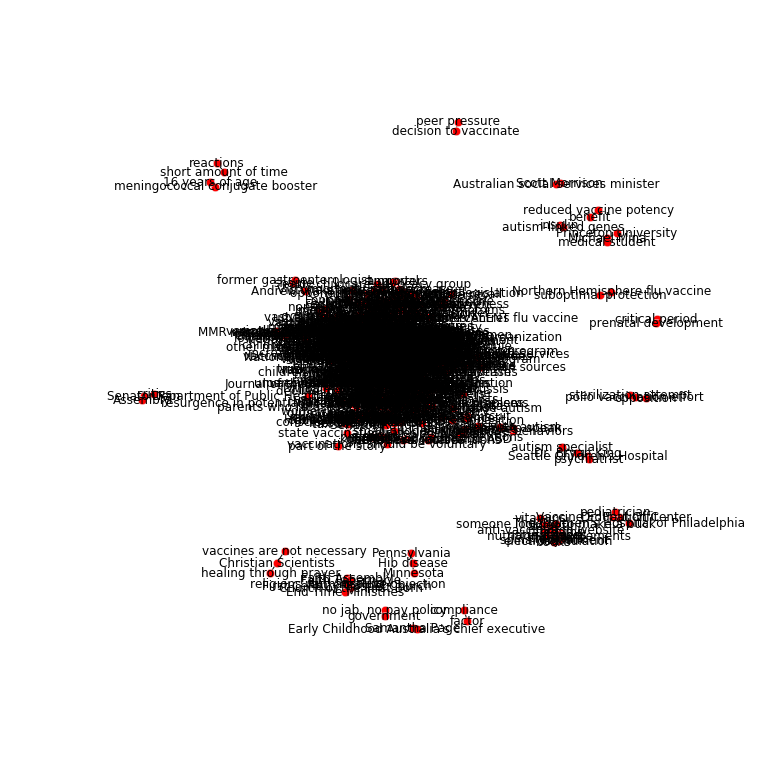

Drawing component of size 585:


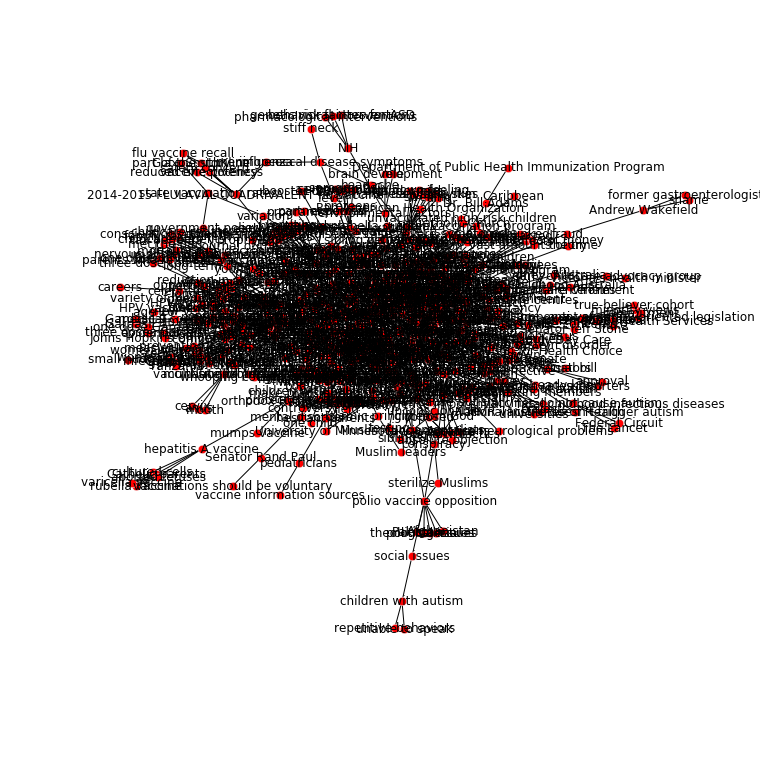

Drawing component of size 15:


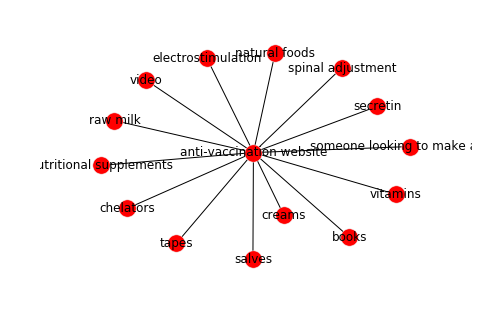

Drawing component of size 7:


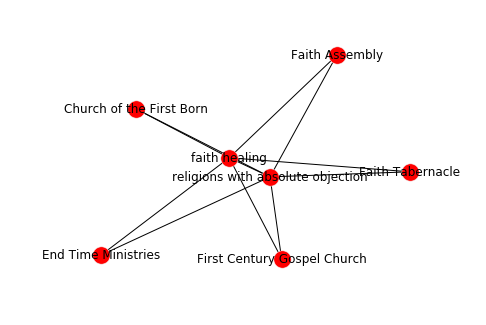

Drawing component of size 4:


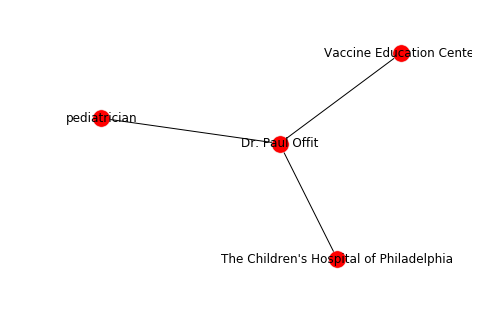

Drawing component of size 4:


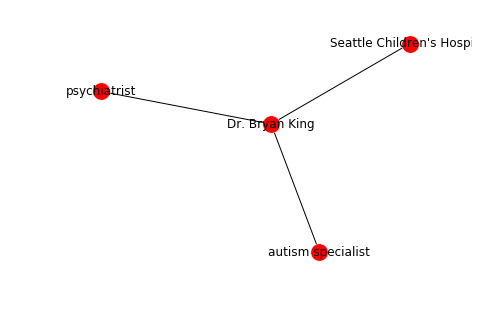

Drawing component of size 3:


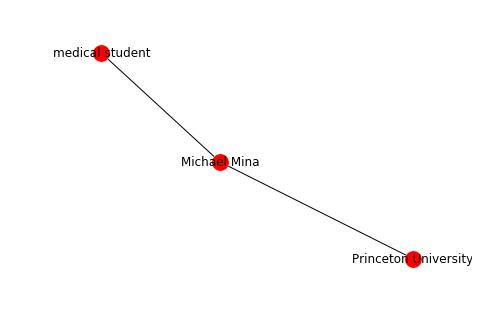

Drawing component of size 3:


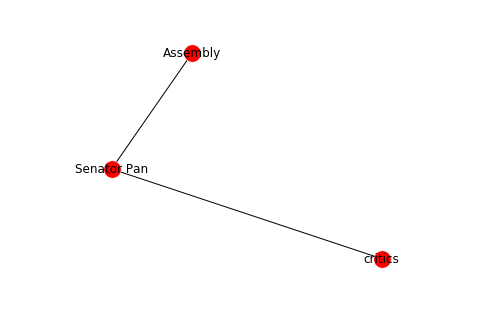

Drawing component of size 3:


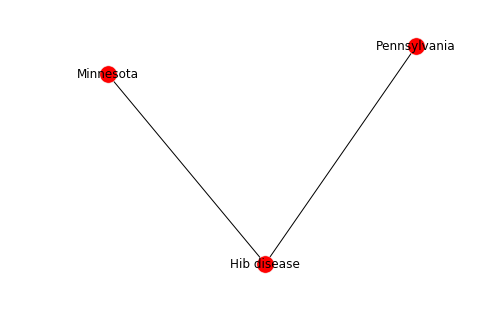

Drawing component of size 3:


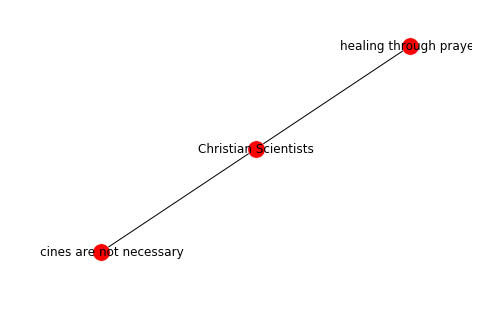

Drawing component of size 3:


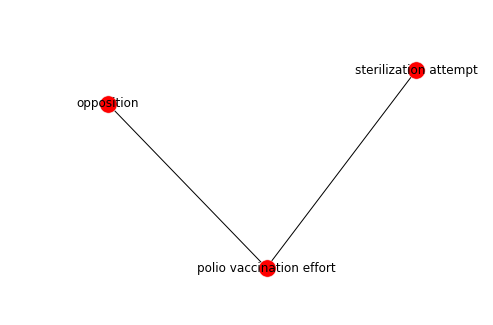

Drawing component of size 2:


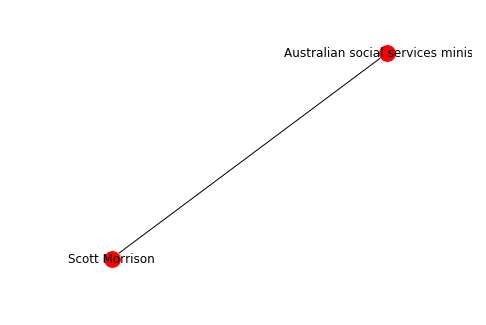

Drawing component of size 2:


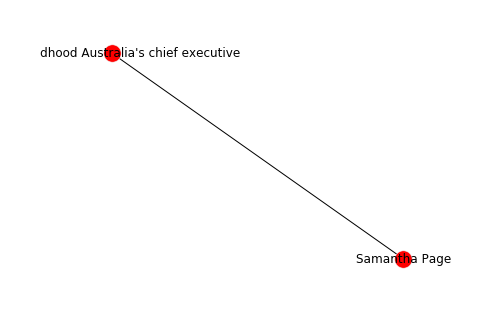

Drawing component of size 2:


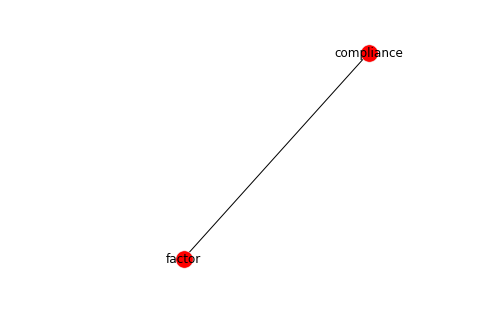

Drawing component of size 2:


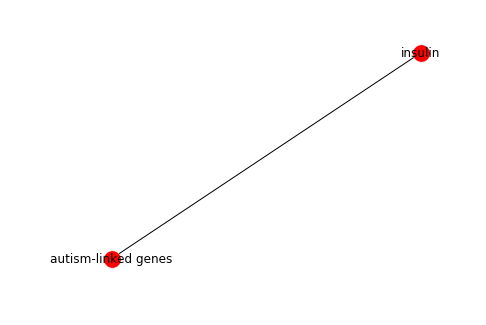

Drawing component of size 2:


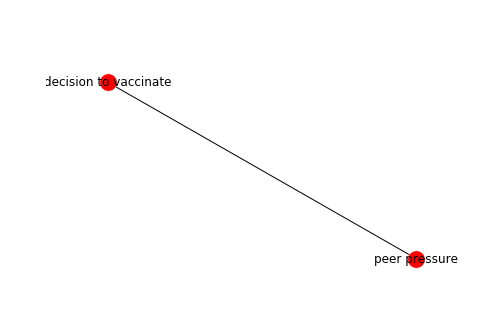

Drawing component of size 2:


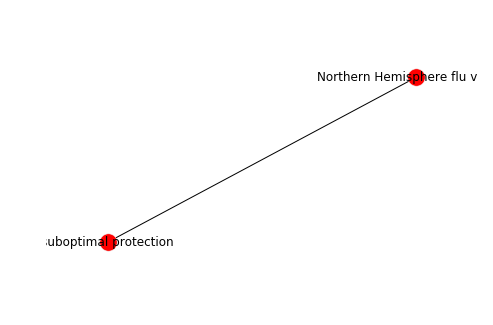

Drawing component of size 2:


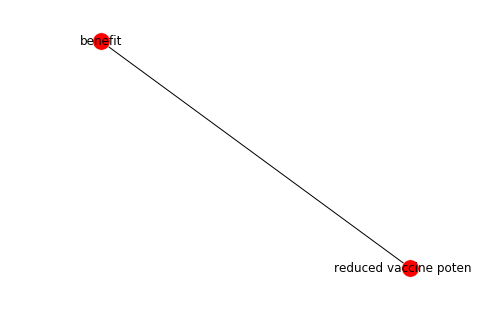

Drawing component of size 2:


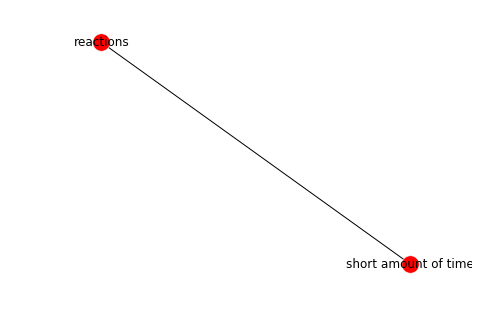

Drawing component of size 2:


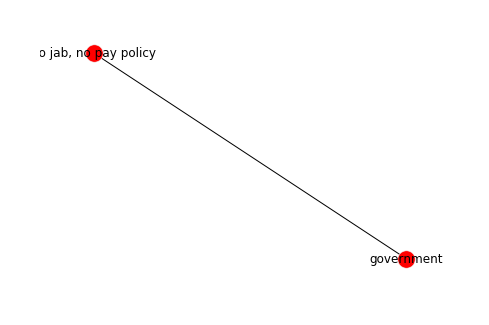

Drawing component of size 2:


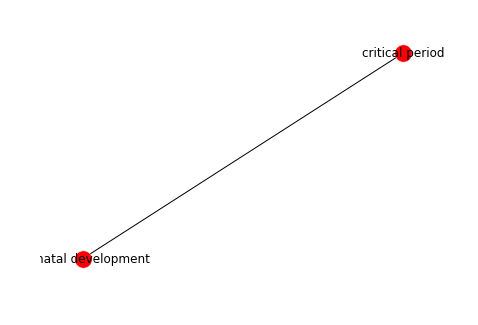

Drawing component of size 2:


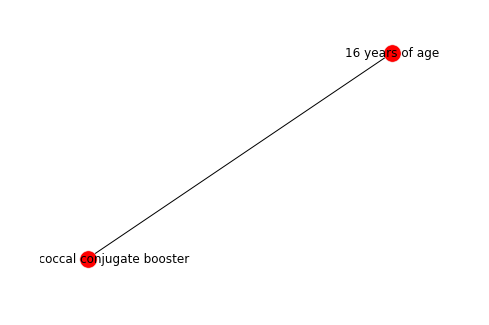

In [9]:
# UNDIRECTED network graph
describeGraph(ugraph)

Graph has 1140 edges, 652 nodes, 21 connected components

Drawing graph of size 652:


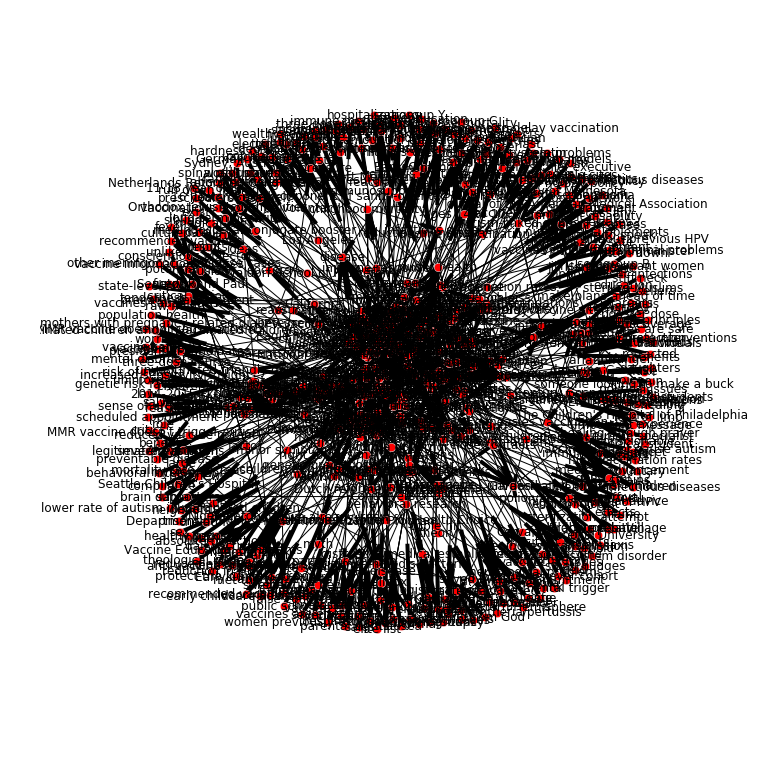

Drawing component of size 585:


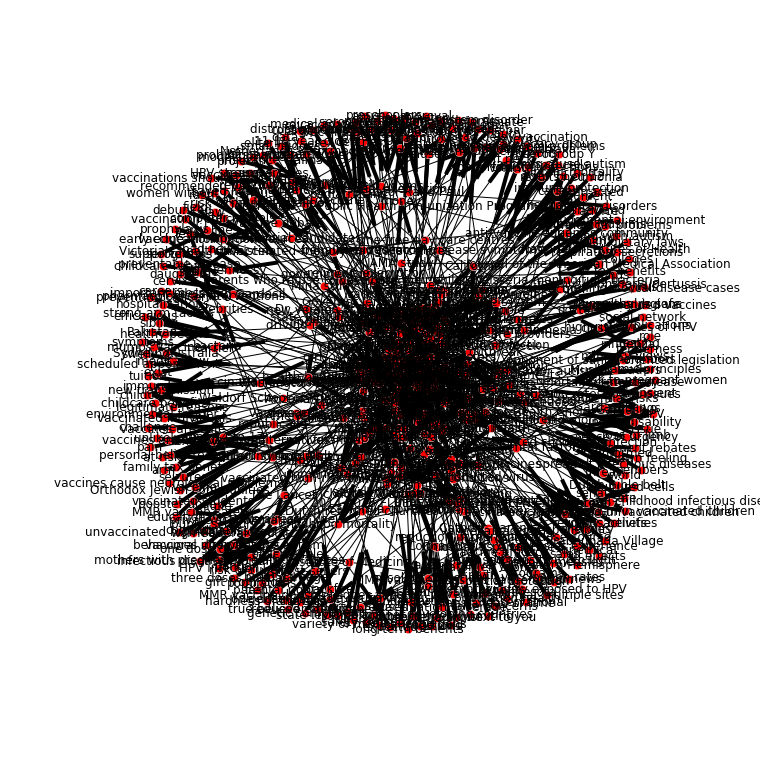

Drawing component of size 15:


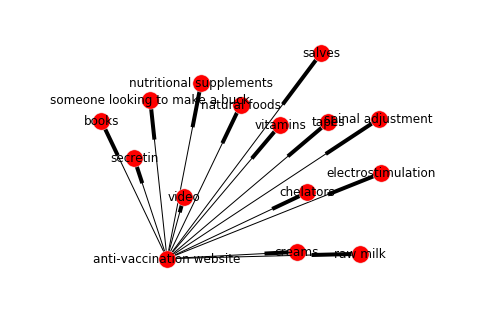

Drawing component of size 7:


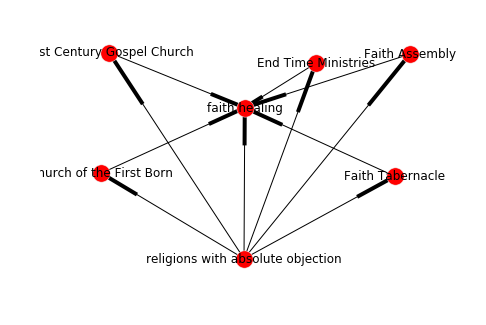

Drawing component of size 4:


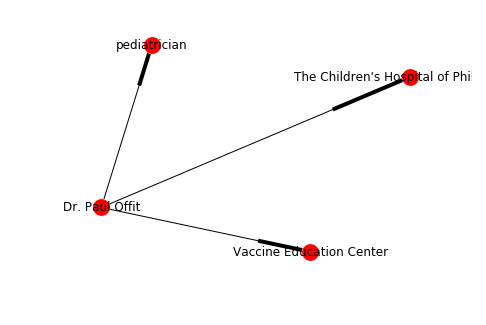

Drawing component of size 4:


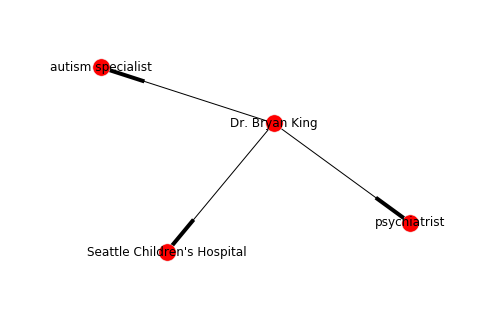

Drawing component of size 3:


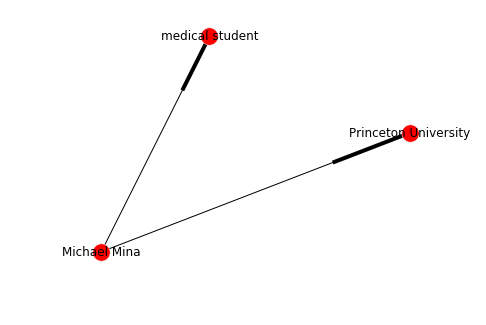

Drawing component of size 3:


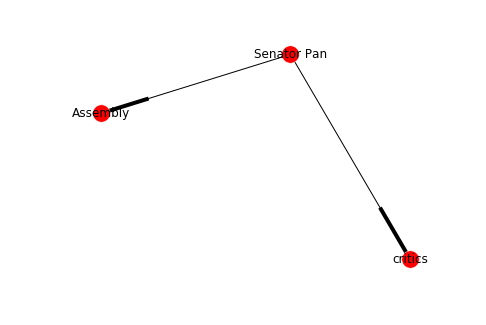

Drawing component of size 3:


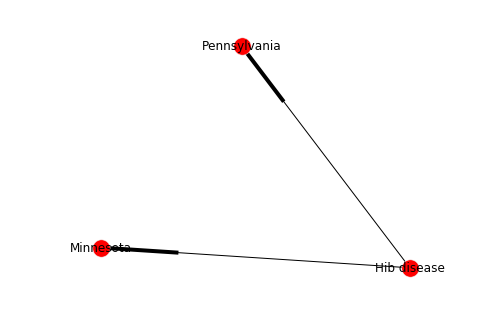

Drawing component of size 3:


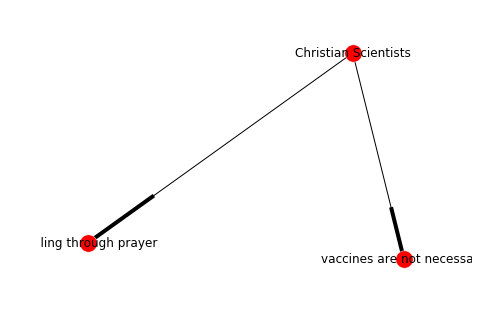

Drawing component of size 3:


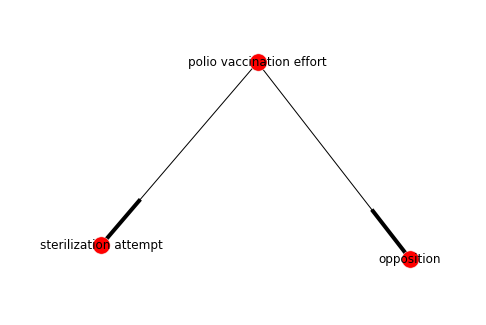

Drawing component of size 2:


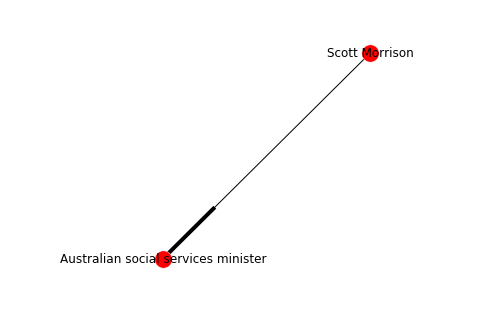

Drawing component of size 2:


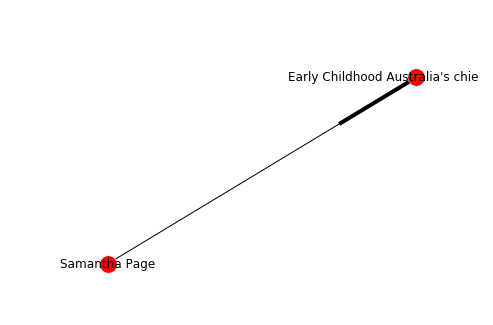

Drawing component of size 2:


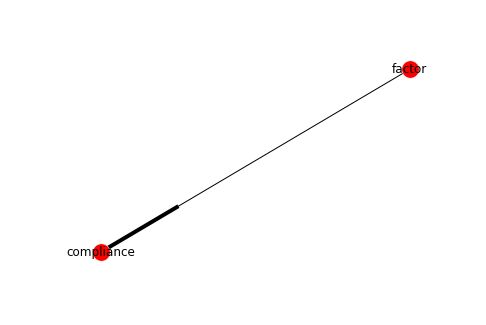

Drawing component of size 2:


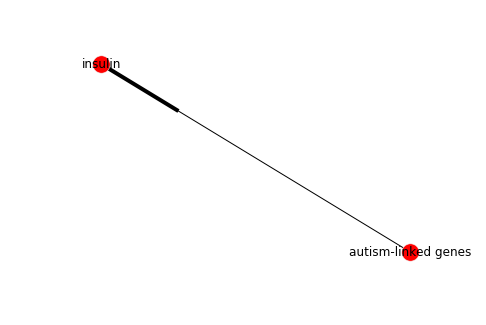

Drawing component of size 2:


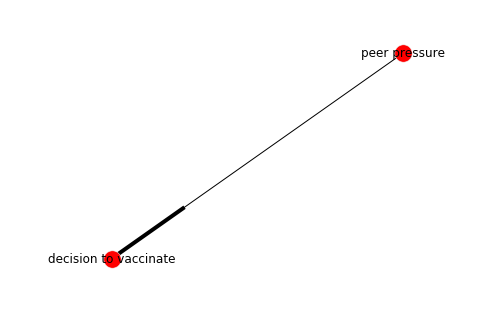

Drawing component of size 2:


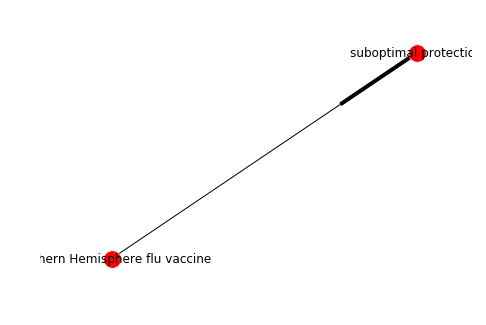

Drawing component of size 2:


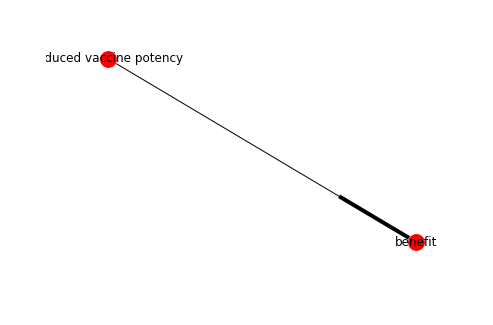

Drawing component of size 2:


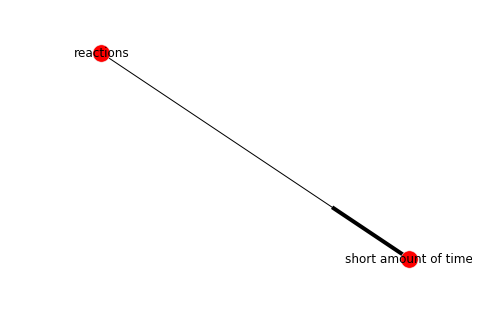

Drawing component of size 2:


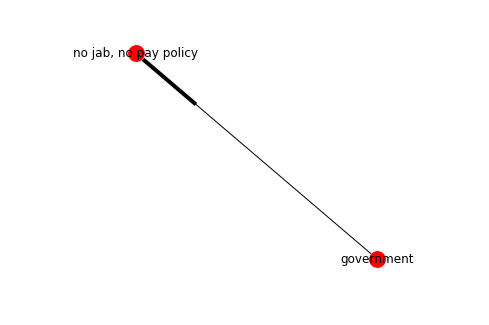

Drawing component of size 2:


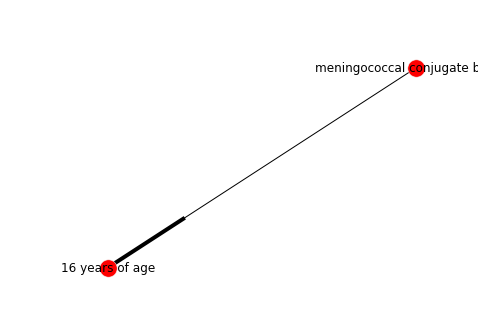

Drawing component of size 2:


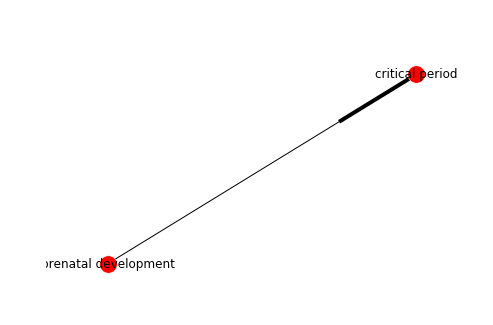

In [10]:
# DIRECTED network graph
describeGraph_d(graph)

## Undirected

In [11]:
# list of connected components by size (undirected graph)
connected_components = [len(c) for c in sorted(nx.connected_components(ugraph), key=len, reverse=True)]

# generate connected components as subgraphs (undirected graph)
subgraphs = list(nx.connected_component_subgraphs(ugraph))

# greatest component (undirected MultiGraph)
u_Gc = max(nx.connected_component_subgraphs(ugraph), key=len)
u_Gc.name = "undirected Gc"

In [12]:
print "connected components = ", connected_components
print nx.info(u_Gc)

connected components =  [585, 15, 7, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Name: undirected Gc
Type: MultiGraph
Number of nodes: 585
Number of edges: 1088
Average degree:   3.7197


## Directed

In [13]:
# use directed graph
components = sorted(nx.weakly_connected_components(graph), key = len, reverse = True)
cc = [len(c) for c in components]

# generate connected components as subgraphs 
subgraphs = list(nx.weakly_connected_component_subgraphs(graph))

# greatest component
d_Gc = max(nx.weakly_connected_component_subgraphs(graph), key=len)
d_Gc.name = "directed Gc"

In [14]:
print "connected components = ", cc
print nx.info(d_Gc)

connected components =  [585, 15, 7, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Name: directed Gc
Type: MultiDiGraph
Number of nodes: 585
Number of edges: 1088
Average in degree:   1.8598
Average out degree:   1.8598


In [15]:
## understand how direction changes degree ##

print nx.info(graph)  # original directed
print nx.info(ugraph)  # to undirected
temp = ugraph.to_directed()  # back to directed
print nx.info(temp)

Name: article_pos1.gml
Type: MultiDiGraph
Number of nodes: 652
Number of edges: 1140
Average in degree:   1.7485
Average out degree:   1.7485
Name: article_pos1.gml
Type: MultiGraph
Number of nodes: 652
Number of edges: 1140
Average degree:   3.4969
Name: article_pos1.gml
Type: MultiDiGraph
Number of nodes: 652
Number of edges: 2280
Average in degree:   3.4969
Average out degree:   3.4969


In [16]:
# finally, greatest components for undirected and directed graphs
print nx.info(u_Gc)
print nx.info(d_Gc)

Name: undirected Gc
Type: MultiGraph
Number of nodes: 585
Number of edges: 1088
Average degree:   3.7197
Name: directed Gc
Type: MultiDiGraph
Number of nodes: 585
Number of edges: 1088
Average in degree:   1.8598
Average out degree:   1.8598


In [17]:
# save Gc
#nx.write_gml(u_Gc, "../output/network/u_Gc_positive.gml")
#nx.write_gml(d_Gc, "../output/network/d_Gc_positive.gml")

- - -

# Calculate network statistics (averages) for greatest component.

In [18]:
# load directed Gc
Gc_files = glob('../output/network/d_Gc_positive.gml')

network_data_columns = ['name',
                    'sentiment',
                    '# nodes',
                    '# edges',
                    #'avg deg',
                    'density',
                    'deg assort coef', 
                    'avg deg cent',
                    'avg bet cent',
                    'avg clo cent',
                    'high deg cent',
                    'high bet cent',
                    'high clo cent',
                    'avg node conn',
                    '# conn comp',
                    'gc size'
                    ]
network_data = pd.DataFrame(columns = network_data_columns)

In [19]:
# Gc_files

for graph_num, gml_graph in enumerate(Gc_files):
    graph = nx.read_gml(gml_graph)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)
    
    # calculate variables
    sent = "positive"
    nodes = nx.number_of_nodes(graph)
    edges = nx.number_of_edges(graph)
    density = float("{0:.4f}".format(nx.density(graph)))
    avg_deg_cen = np.array(nx.degree_centrality(graph).values()).mean()
    avg_bet_cen = np.array(nx.betweenness_centrality(graph).values()).mean()
    avg_clo_cen = np.array(nx.closeness_centrality(graph).values()).mean()
    #avg_deg = float("{0:.4f}".format(in_deg + out_deg))
    avg_node_con = float("{0:.4f}".format((nx.average_node_connectivity(graph))))
    deg_assort_coeff = float("{0:.4f}".format((nx.degree_assortativity_coefficient(graph))))
    conn_comp = nx.number_weakly_connected_components(graph) # ugraph
    deg_cen = nx.degree_centrality(graph)
    bet_cen = nx.betweenness_centrality(graph)
    clo_cen = nx.closeness_centrality(graph)
    highest_deg_cen = highest_centrality(deg_cen)
    highest_bet_cen = highest_centrality(bet_cen)
    highest_clo_cen = highest_centrality(clo_cen)
    Gc = len(max(nx.weakly_connected_component_subgraphs(graph), key=len))

    # save variables into list
    graph_values = {'name':filename,
                    'sentiment':sent,
                    '# nodes':nodes,
                    '# edges':edges,
                    #'avg deg':avg_deg,
                    'density':density,
                    'deg assort coef':deg_assort_coeff,
                    'avg deg cent':"%.4f" % avg_deg_cen,
                    'avg bet cent':"%.4f" % avg_bet_cen,
                    'avg clo cent':"%.4f" % avg_clo_cen,
                    'high deg cent':highest_deg_cen,
                    'high bet cent':highest_bet_cen,
                    'high clo cent':highest_clo_cen,
                    'avg node conn':avg_node_con,
                    '# conn comp':conn_comp,
                    'gc size':Gc
                    }
    network_data = network_data.append(graph_values, ignore_index=True)

----------
../output/network/d_Gc_positive.gml
Name: d_Gc_positive.gml
Type: MultiDiGraph
Number of nodes: 585
Number of edges: 1088
Average in degree:   1.8598
Average out degree:   1.8598


In [20]:
# print network data for greatest component
network_data

,name,sentiment,# nodes,# edges,density,deg assort coef,avg deg cent,avg bet cent,avg clo cent,high deg cent,high bet cent,high clo cent,avg node conn,# conn comp,gc size
0,d_Gc_positive.gml,positive,585.0,1088.0,0.0032,-0.0336,0.0064,0.0018,0.0517,"(vaccines, 0.116438356164)","(vaccines, 0.0795089514173)","(parents, 0.23574182936)",0.2974,1.0,585.0


In [21]:
# save
#network_data.to_csv('../output/df/Gc_df_pos.csv')

- - -

# Cutsets

In [22]:
print "Greatest component size =", len(graph)

Greatest component size = 585


In [23]:
# returns all minimum k cutsets of an undirected graph
# i.e., the set(s) of nodes of cardinality equal to the node connectivity of G
# thus if removed, would break G into two or more connected components

#cutsets = list(nx.all_node_cuts(graph))  # must be undirected

print "Greatest component size =", len(graph)
#print "# of cutsets =", len(cutsets)

# returns a set of nodes or edges of minimum cardinality that disconnects G
min_ncut = nx.minimum_node_cut(graph)
min_ecut = nx.minimum_edge_cut(graph)

print "Min node cut =", min_ncut
print "Min edge cut =", min_ecut

# min cuts with source and target
print nx.minimum_node_cut(graph, s='vaccines', t='autism')
print nx.minimum_edge_cut(graph, s='vaccines', t='autism')

Greatest component size = 585
Min node cut = set([])
Min edge cut = set([])
set([u'protective effect of vaccines', u'children at higher risk for autism', u'MMR vaccine', u'children with autistic sibling', u'anti-vaccination', u'parents', u'children'])
set([(u'children at higher risk for autism', u'autism'), (u'genetic predisposition', u'autism'), (u'children', u'autism'), (u'MMR vaccine', u'autism'), (u'vaccines', u'autism'), (u'anti-vaccination', u'autism'), (u'children with autistic sibling', u'autism'), (u'parents', u'autism'), (u'protective effect of vaccines', u'autism')])


In [24]:
# read edge labels in min cut for Gc
# change source and target
a = nx.minimum_edge_cut(graph, s='vaccines', t='autism')
#a = nx.minimum_edge_cut(graph)

labels = nx.get_edge_attributes(graph,'edge')
edgelabels = {}
for e in labels.keys():
    e1 = e[0:2]
    edgelabels[e1]=labels[e]

for e in a:
    if edgelabels.has_key(e):
        print e,edgelabels[e]
    else:
        rev_e = e[::-1]
        print rev_e, edgelabels[rev_e]

(u'children at higher risk for autism', u'autism') were not more likely to develop
(u'genetic predisposition', u'autism') makes more vulnerable to
(u'children', u'autism') one in 68 kids has some form of
(u'MMR vaccine', u'autism') researchers were unable to find any association with
(u'vaccines', u'autism') cause
(u'anti-vaccination', u'autism') is driven by fears that shots cause
(u'children with autistic sibling', u'autism') more likely to have
(u'parents', u'autism') who already have a child with autism seem even more concerned
(u'protective effect of vaccines', u'autism') may protect children from


- - -

# Centrality tables

In [49]:
# make sure you're using the right graph
print "gml_files = ", gml_files
print "gml_graph = ", gml_graph

gml_files =  ['../output/network/article_pos1.gml']
gml_graph =  ../output/network/d_Gc_positive.gml


In [53]:
#graph = nx.read_gml('../output/network/article_pos1.gml')  # full network
graph = nx.read_gml('../output/network/d_Gc_positive.gml')  # gc network

print nx.info(graph)

Name: directed Gc
Type: MultiDiGraph
Number of nodes: 585
Number of edges: 1088
Average in degree:   1.8598
Average out degree:   1.8598


In [54]:
# degree centrality
dc = nx.degree_centrality(graph)
dc_df = pd.DataFrame.from_dict(dc, orient = 'index')
dc_df.columns = ['degree cent']
dc_df = dc_df.sort_values(by = ['degree cent'])
#dc_df

# betweenness centrality
bc = nx.betweenness_centrality(graph)
bc_df = pd.DataFrame.from_dict(bc, orient = 'index')
bc_df.columns = ['betweenness cent']
bc_df = bc_df.sort_values(by = ['betweenness cent'])
#bc_df

# closeness centrality
cc = nx.closeness_centrality(graph)
cc_df = pd.DataFrame.from_dict(cc, orient = 'index')
cc_df.columns = ['closeness cent']
cc_df = cc_df.sort_values(by = ['closeness cent'])
#cc_df

In [55]:
dc_df

,degree cent
neighbors,0.001712
children with family history of autism,0.001712
immune memory cells,0.001712
democrat,0.001712
three-dose course,0.001712
protect the kid next to you,0.001712
childcare benefits,0.001712
worried,0.001712
state-level policy,0.001712
infant mortality,0.001712


In [56]:
bc_df

,betweenness cent
neighbors,0.000000
rash,0.000000
severe symptoms,0.000000
mouth,0.000000
delaying Gardasil,0.000000
World Health Organization,0.000000
reduction in mortality,0.000000
fear,0.000000
deafness,0.000000
Jewish dietary laws,0.000000


In [52]:
cc_df

,closeness cent
neighbors,0.000000
arm,0.000000
elite list,0.000000
sex,0.000000
testing,0.000000
free vaccine,0.000000
medical law,0.000000
strong-arm tactics,0.000000
gift from God,0.000000
at risk,0.000000
